In [1]:
import numpy as np
from numpy import array
#import tensorflow as tf
import keras
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import numpy as np
import time

/home/ankur/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#function to load the file and convert the data to numpy array

def Data(file,mode):
    infile=open(file,mode)
    new_dict=pickle.load(infile)
    infile.close()
    np_array_form = np.array(new_dict)
    return new_dict,np_array_form

In [3]:
#train features
new_dict,train_data=Data('train_image.pkl', 'rb')
train_features=train_data/255
data= train_features.reshape((train_features.shape[0], 28, 28, 1)) #(8000,784)-->(8000,28,28,1)

In [4]:
#train_labels
new_dict_1,train_label=Data('train_label.pkl', 'rb')

In [5]:
#frequency of each class
unique_elements, counts_elements = np.unique(train_label, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    2    3    6]
 [2000 2000 2000 2000]]


In [6]:
#plotting the images so that we can get the idea of shapes of the images
def sample_images(start,end,new_dict):
    for j,i in enumerate(new_dict):
        if j>=start and j<end:
            a = np.array(i)
            t=a.reshape(28,28)
            plt.imshow(255-t,cmap='gray')
            print(j)
            plt.show()
            # Wait for 1 seconds
            #time.sleep(1)

0


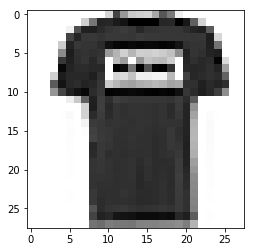

1


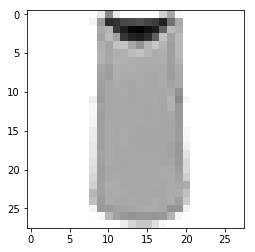

2


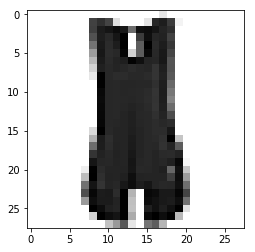

3


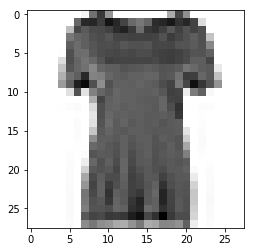

In [11]:
#plotting the images of class 0
sample_images(0,4,new_dict)

2000


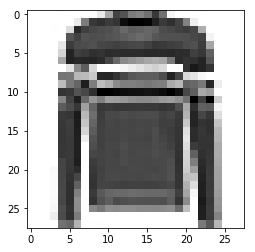

2001


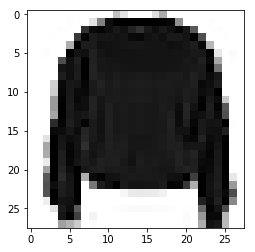

2002


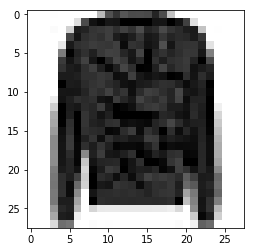

2003


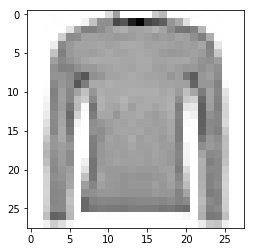

In [12]:
#plotting the images of class 2
sample_images(2000,2004,new_dict)

4000


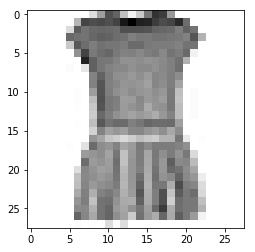

4001


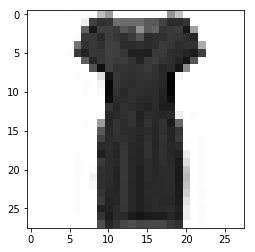

4002


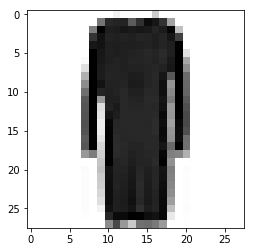

4003


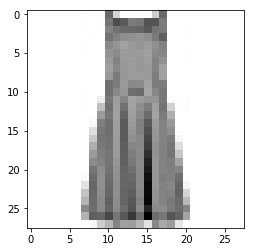

In [13]:
#plotting the images of class 3
sample_images(4000,4004,new_dict)

6000


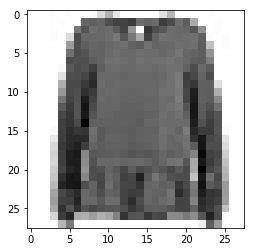

6001


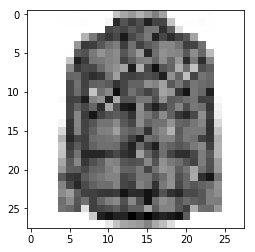

6002


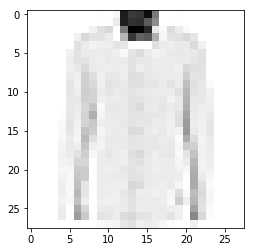

6003


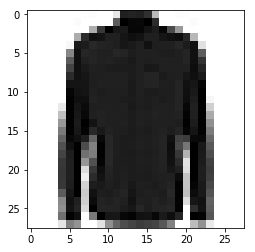

In [10]:
#plotting the images of class 6
sample_images(6000,6004,new_dict)

In [16]:
#After plotting the images we get 0-->half_T-shirt , 2-->full_armed, 3-->ladies_Dresses, 6-->shirt
#encoding the labels 0-->0, 2-->1 , 3-->2, 6-->3
train_label[2000:4000]=1
train_label[4000:6000]=2
train_label[6000:8000]=3
train_label = np.array(train_label).reshape(-1, 1)

In [15]:
# one hot encode labels:
encoded_label = to_categorical(train_label)

In [17]:
# Defination of the Sequential CNN

# Initialising the Convolutional Neural Network
model = Sequential()
# Adding convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
# Adding dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Adding dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Adding dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [18]:
#compile
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [19]:
#model_summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [20]:
#splitting the train data
X_train, X_val, y_train, y_val = train_test_split(data, encoded_label, test_size=0.2, random_state=2048)

In [21]:
#Fitting
history = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=35,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 6400 samples, validate on 1600 samples
Epoch 1/35
6400/6400 [==============================] - 6s 898us/step - loss: 0.9412 - acc: 0.5698 - val_loss: 0.6912 - val_acc: 0.6981
Epoch 2/35
6400/6400 [==============================] - 5s 711us/step - loss: 0.6810 - acc: 0.6928 - val_loss: 0.6029 - val_acc: 0.7688
Epoch 3/35
6400/6400 [==============================] - 5s 732us/step - loss: 0.6025 - acc: 0.7475 - val_loss: 0.5342 - val_acc: 0.8050
Epoch 4/35
6400/6400 [==============================] - 5s 714us/step - loss: 0.5444 - acc: 0.7739 - val_loss: 0.4821 - val_acc: 0.8256
Epoch 5/35
6400/6400 [==============================] - 5s 713us/step - loss: 0.5132 - acc: 0.7897 - val_loss: 0.4777 - val_acc: 0.8244
Epoch 6/35
6400/6400 [==============================] - 5s 782us/step - loss: 0.4787 - acc: 0.8078 - val_loss: 0.4444 - val_acc: 0.8306
Epoch 7/35
6400/6400 [==============================] - 5s 780us/step - loss: 0.4510 - acc: 0.8152 - val_loss: 0.4622 - val_acc: 0.8050


In [24]:
#function for plotting losses and accuracies
def plotting(string):
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    if string=="loss":
        plt.semilogy(history.history['loss'])
        plt.semilogy(history.history['val_loss'])
    if string=="acc":
        plt.semilogy(history.history['acc'])
        plt.semilogy(history.history['val_acc'])
    
    plt.title(string+"-plot")
    plt.ylabel(string)
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper right')

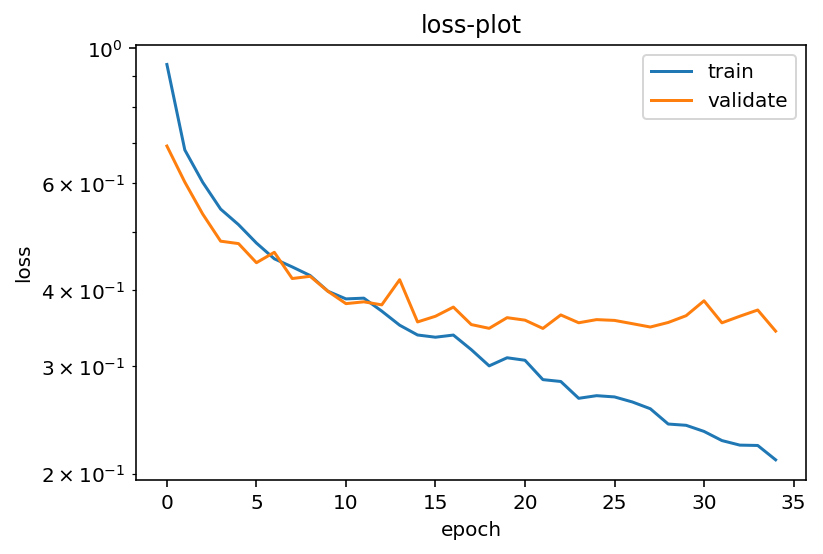

In [25]:
#plot of loss
plotting("loss")

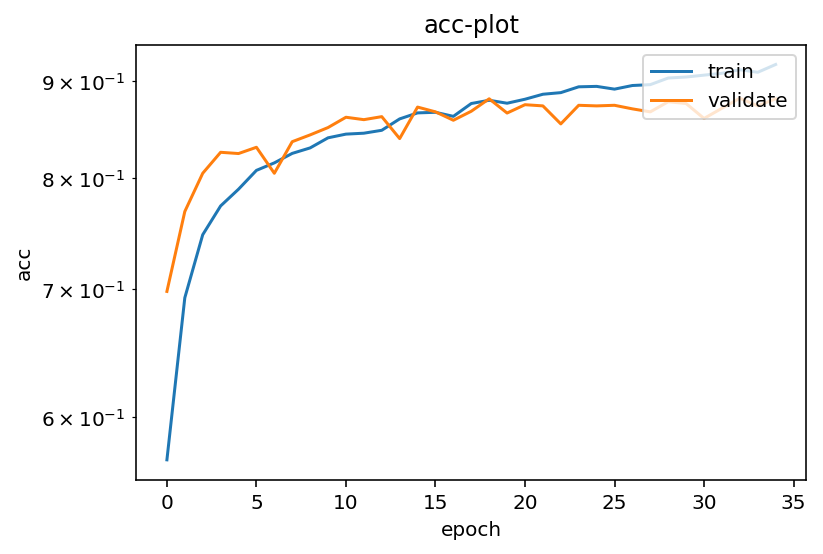

In [26]:
##plot of accuracy
plotting("acc")

In [27]:
#test_features
test_dict,test_1=Data('test_image.pkl', 'rb')
test_features=test_1/255
x_test = test_features.reshape((test_features.shape[0], 28, 28, 1))

In [28]:
#predicting the labels
predicted_labels=model.predict(x_test).argmax(axis=1)

In [29]:
#Decoding the labels to original ones
#0-->0,1-->2,2-->3,3-->6
predicted=np.zeros((2000,), dtype=int)
for i,j in enumerate(predicted_labels):
    if j==0:
        predicted[i]=0
    if j==1:
        predicted[i]=2
    if j==2:
        predicted[i]=3
    if j==3:
        predicted[i]=6

In [30]:
#witting to csv as required
import csv
csvData = [['image_index', 'class']]

with open('ankur_kumar.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
    for i,j in enumerate(predicted):
        list_1=[[i,j]]
        writer.writerows(list_1)